<a href="https://colab.research.google.com/github/adrijh/MNIST-CNN/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks on the MNIST Dataset

In this notebook we are gonna experiment with the use of Convolutional Neural Networks on the MNIST dataset for digit clasification. 

We will try a simple network for starters, and see if we can improve its performance with a deeper network using more advanced features

In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model

In [13]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

We divide our data in trainign, validation and test. Also we will scale the colors from 0-255 to 0-1

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_valid = X_train_full[:-5000]/255, X_train_full[-5000:]/255
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test/255
y_test = y_test

In [16]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

As a sanity check, let's make sure everything went as expected plotting an example

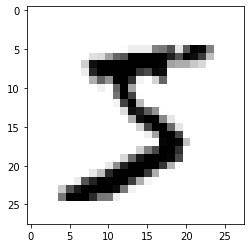

In [ ]:
plt.imshow(X_train[0,...,0], cmap="binary")

# Callbacks

We will use a couple of callbacks during our training process:
- ReduceLearningRateonPlateau: This will allow the model to reduce the learning rate on the fly if the metric we specify doesn't improve

- ModelCheckpoint: This will save our best model

Early Stopping is also a great regularization method (and computational cost saver), however as we will train just for 10 epochs due to time constraints we will not make use of it. As we are saving the best model anyways, this will not impact our ability to get a good performing model

In [6]:
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,min_delta=0.005)
model_check_cb= keras.callbacks.ModelCheckpoint("/tmp", monitor="val_loss", save_best_only=True)
callbacks = [reduce_lr_cb, model_check_cb]

# Simple CNN design

We are gonna use the Keras Sequential API to create a VERY simple model. It is made of 2 convolutional networks and a Dense Network on top. We added MaxPooling so the number of parameters stays small along with Dropout for regularization

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')    
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks)
score = model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 47s 9ms/step - loss: 0.2355 - accuracy: 0.9318 - val_loss: 0.0424 - val_accuracy: 0.9884
INFO:tensorflow:Assets written to: /tmp/assets
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0844 - accuracy: 0.9793 - val_loss: 0.0509 - val_accuracy: 0.9870
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0650 - accuracy: 0.9837 - val_loss: 0.0412 - val_accuracy: 0.9914
INFO:tensorflow:Assets written to: /tmp/assets
Epoch 4/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.0517 - accuracy: 0.9866 - val_loss: 0.0405 - val_accuracy: 0.9910

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
INFO:tensorflow:Assets written to: /tmp/assets
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.0274 - accuracy: 0.9929 - val_loss: 0.0317 - val_accuracy: 0.9930
INFO:tensorflow:Assets written to: /tmp/assets
Epoch

We have an accuracy of 99.4% with such a simple network! Even though the MNIST task is quite easy for a CNN, this is still a great result.

# Trying a deeper CNN

Now we are going to add a few more layers to our model and check how performance is affected by the depth of the network.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 5, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(3,strides=1,padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(3,strides=1,padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation="softmax")    
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks)
score = model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 95s 54ms/step - loss: 0.2289 - accuracy: 0.9350 - val_loss: 0.0423 - val_accuracy: 0.9886
Epoch 2/10
1719/1719 [==============================] - 93s 54ms/step - loss: 0.0864 - accuracy: 0.9785 - val_loss: 0.0322 - val_accuracy: 0.9922
Epoch 3/10
1719/1719 [==============================] - 92s 54ms/step - loss: 0.0633 - accuracy: 0.9843 - val_loss: 0.0372 - val_accuracy: 0.9916
Epoch 4/10
1719/1719 [==============================] - 92s 54ms/step - loss: 0.0548 - accuracy: 0.9868 - val_loss: 0.0430 - val_accuracy: 0.9904
Epoch 5/10
1719/1719 [==============================] - 92s 54ms/step - loss: 0.0472 - accuracy: 0.9885 - val_loss: 0.0357 - val_accuracy: 0.9918

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/10
1719/1719 [==============================] - 92s 54ms/step - loss: 0.0218 - accuracy: 0.9941 - val_loss: 0.0323 - val_accuracy: 0.9934
Epoch 7/10
1719/1719 [====================

Our accuracy improved even further to 99.64% with a deeper model. According to different resources an accuracy of about 99.75% should be the ceiling for this task even with state of the art models, so it will be unlikely we can get a much better accuracy than this.

However for the sake of experimentation, we will try something more complex.

# Inception Modules

GoogleNet introduced the concept of Inception Modules. This layers can capture patterns along spatial and depth dimensions, making them very versatile and powerful. We will create a simple implementation of these modules

In [17]:
def inception_module(input_layer, top_1_filters=64, top_2_filters=128, top_3_filters=32, top_4_filters=32, bottom_2_filters=96, bottom_3_filters=16):
  
  bottom_2 = keras.layers.Conv2D(bottom_2_filters, (1,1), strides=(1,1), padding="same", activation="relu")(input_layer)
  bottom_3 = keras.layers.Conv2D(bottom_3_filters, (1,1), strides=(1,1), padding="same", activation="relu")(input_layer)
  bottom_4 = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding="same")(input_layer)
  top_1 = keras.layers.Conv2D(top_1_filters, (1,1), strides=(1,1), padding="same", activation="relu")(input_layer)
  top_2 = keras.layers.Conv2D(top_2_filters, (3,3), strides=(1,1), padding="same", activation="relu")(bottom_2)
  top_3 = keras.layers.Conv2D(top_3_filters, (5,5), strides=(1,1), padding="same", activation="relu")(bottom_3)
  top_4 = keras.layers.Conv2D(top_4_filters, (1,1), strides=(1,1), padding="same", activation="relu")(bottom_4)
  output = keras.layers.Concatenate()([top_1,top_2,top_3,top_4])
  return output

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Due to computational time, we will use just two inception modules introduced on the previous Neural Network. This time we will use the Keras Functional API

In [23]:
input = keras.layers.Input(shape=[28,28,1])
conv1 = keras.layers.Conv2D(32, 5, activation="relu", padding="same", input_shape=[28,28,1])(input)
conv2 = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
pol1 = keras.layers.MaxPooling2D(3,strides=1,padding="same")(conv2)
incep1 = inception_module(pol1)
incep2 = inception_module(incep1, top_1_filters=128, top_2_filters=192, top_3_filters=96, top_4_filters=64, bottom_2_filters=128,bottom_3_filters=32 )
pol2= keras.layers.MaxPooling2D(3,strides=1,padding="same")(incep2)
flat = keras.layers.Flatten()(pol2)
dense1 = keras.layers.Dense(units=256, activation="relu")(flat)
drop1 = keras.layers.Dropout(0.3)(dense1)
dense2 = keras.layers.Dense(units=64, activation="relu")(drop1)
drop2 = keras.layers.Dropout(0.5)(dense2)
output = keras.layers.Dense(units=10, activation="softmax")(drop2)

model = keras.Model(inputs=[input], outputs=[output])

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks)
score = model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 185s 106ms/step - loss: 0.2453 - accuracy: 0.9334 - val_loss: 0.0418 - val_accuracy: 0.9898
Epoch 2/10
1719/1719 [==============================] - 183s 106ms/step - loss: 0.0878 - accuracy: 0.9798 - val_loss: 0.0410 - val_accuracy: 0.9908
Epoch 3/10
1719/1719 [==============================] - 182s 106ms/step - loss: 0.0683 - accuracy: 0.9831 - val_loss: 0.0408 - val_accuracy: 0.9910
Epoch 4/10
1719/1719 [==============================] - 182s 106ms/step - loss: 0.0546 - accuracy: 0.9871 - val_loss: 0.0376 - val_accuracy: 0.9916

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/10
1719/1719 [==============================] - 182s 106ms/step - loss: 0.0286 - accuracy: 0.9932 - val_loss: 0.0267 - val_accuracy: 0.9946
Epoch 6/10
1719/1719 [==============================] - 181s 106ms/step - loss: 0.0198 - accuracy: 0.9949 - val_loss: 0.0255 - val_accuracy: 0.9950
INFO:tensorflow:Assets written

The addition of Inception modules didn't seem to help our model. However this is to be expected as our model is relatively shallow compared with the models that can make the most of these advanced features. Also we already have great accuracy in this task and further improvement, if possible, will require very specific methods and more advanced networks

To visualize the structure of the neural network and inception modules it can be useful to print the model

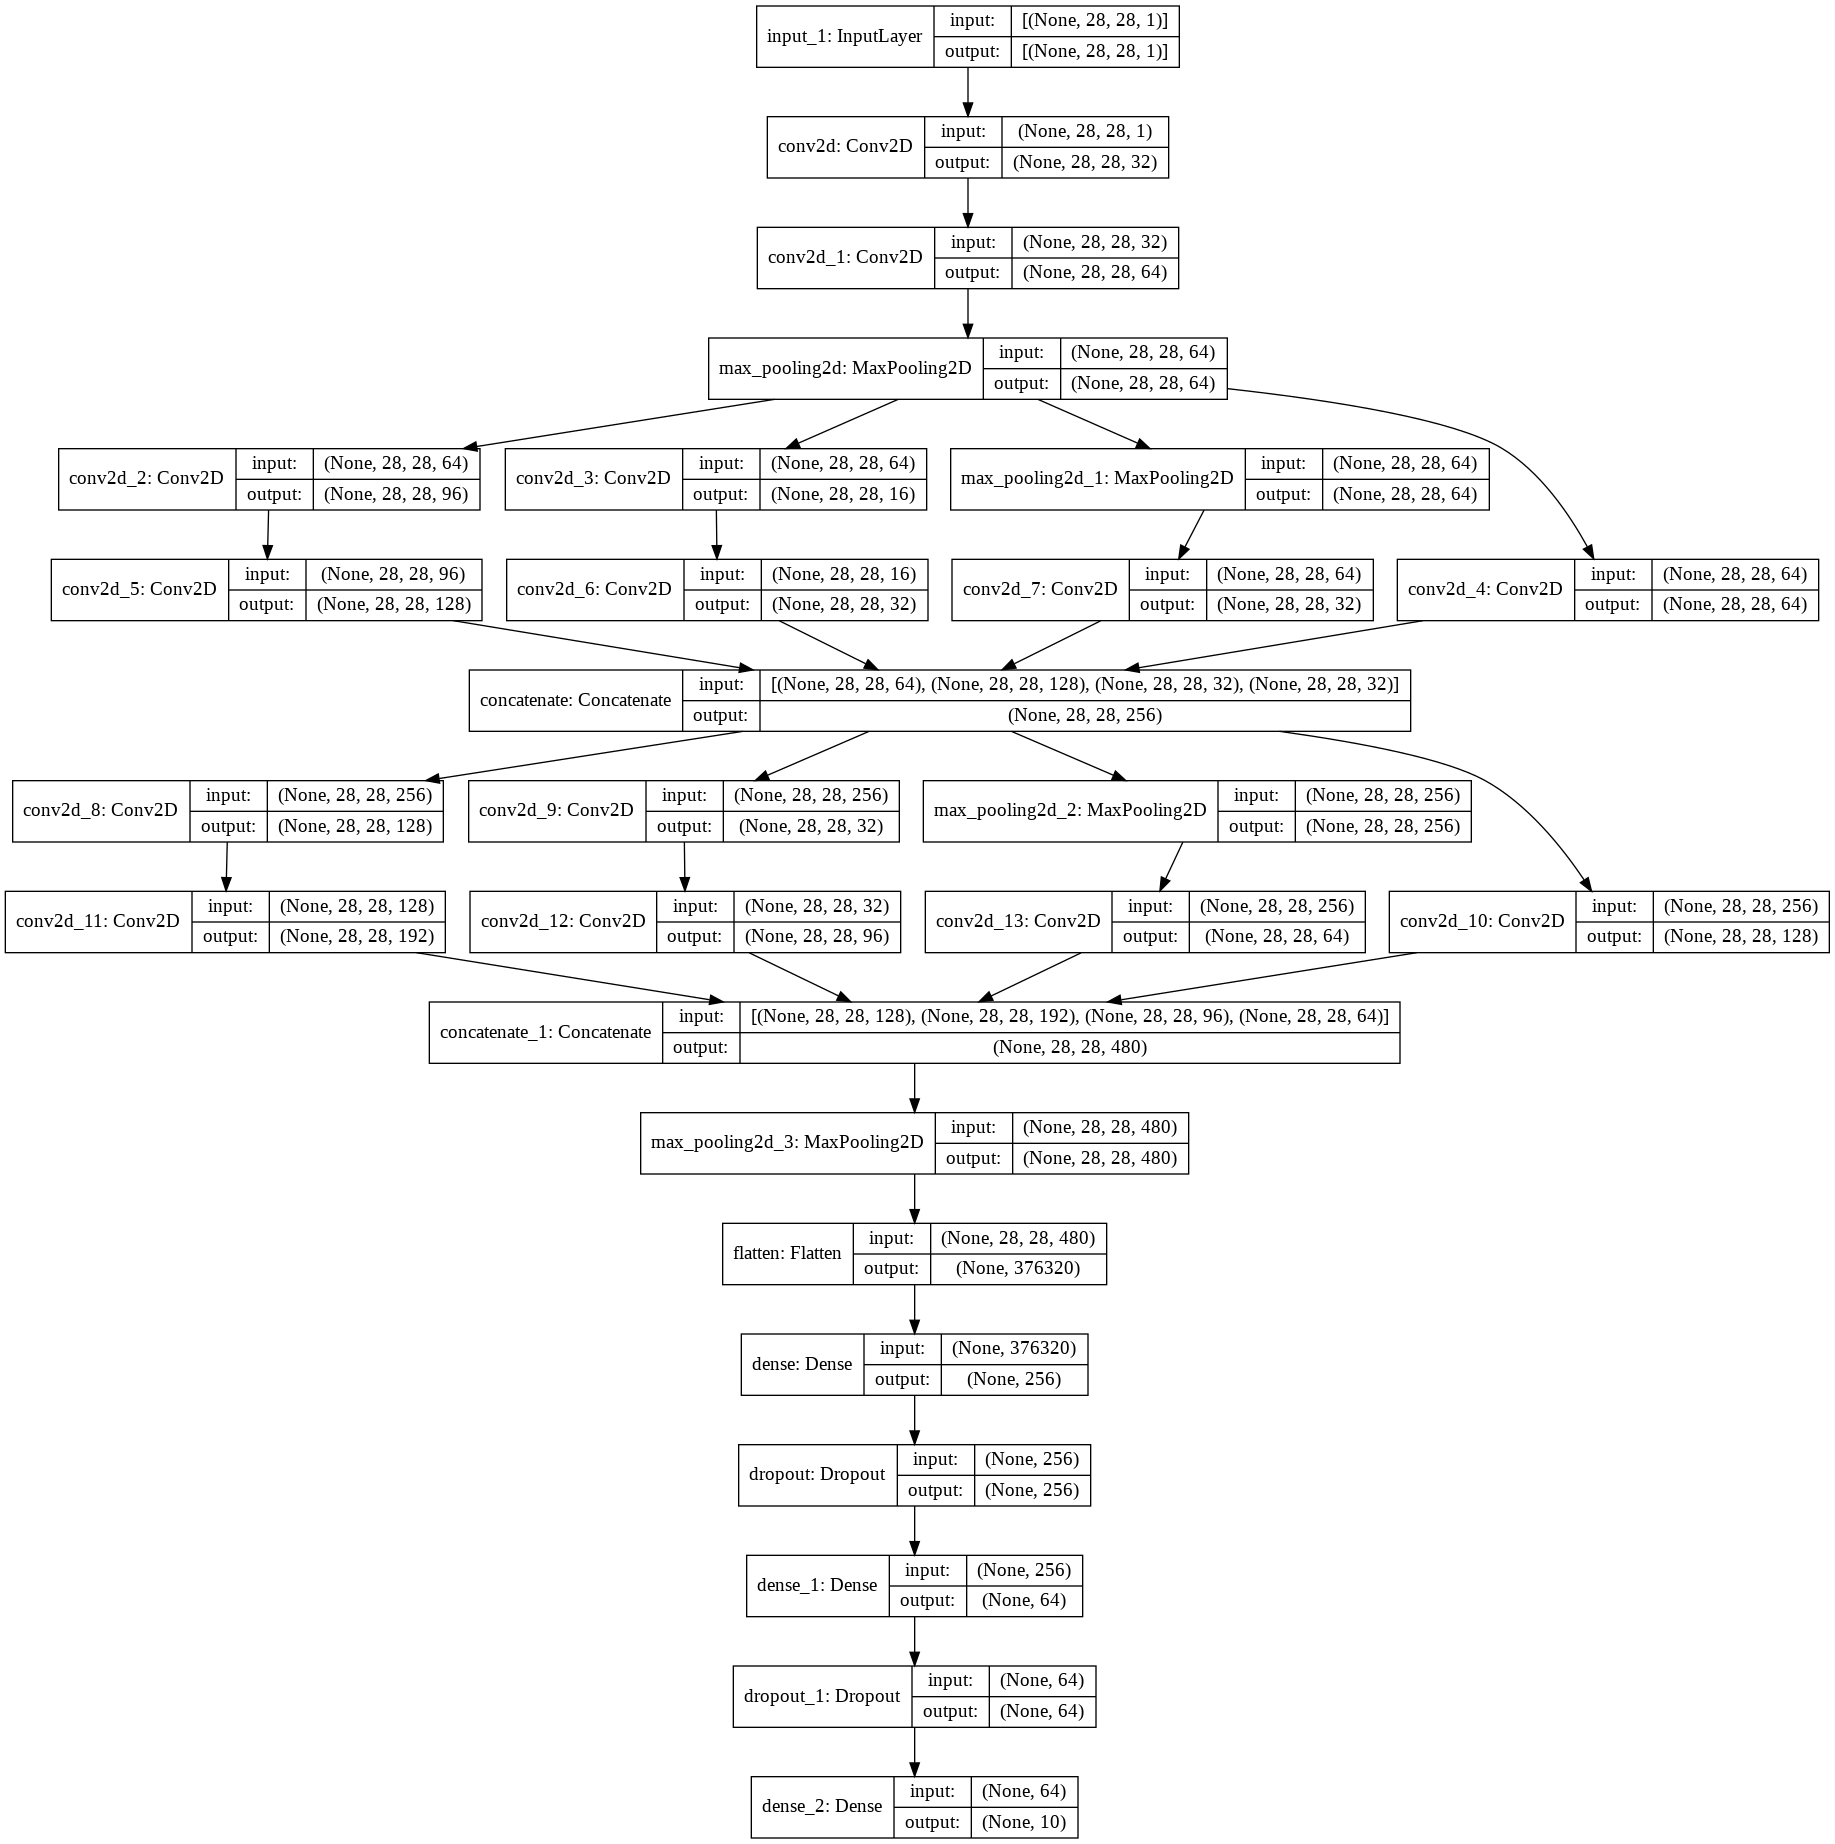

In [25]:
plot_model(model, show_shapes=True, to_file='our_model.png')